In [1]:
import json
import pandas as pd


In [4]:
import os

os.getcwd()

'C:\\Users\\sundeepm\\source\\MIDS\\w266\\w266-final-project\\EricL'

In [3]:
with open (".\\..\\VIST\\sis\\val.story-in-sequence.json") as f:
    data = json.load(f)

FileNotFoundError: [Errno 2] No such file or directory: '.\\VIST\\sis\\val.story-in-sequence.json'

In [204]:
# Build the image dictionary, which is querable by image id.

image_by_id = {x["id"]: x for x in data["images"]}
print(f"Number of images: {len(image_by_id.keys())}")
list(image_by_id.keys())[:5]


Number of images: 21048


['694227468', '694227344', '694227412', '694227488', '694227508']

In [203]:
# Builds the story dictionary, which is querable by story id.

df = pd.DataFrame([d[0] for d in data["annotations"]])
stories = df.groupby(["story_id"])
story_by_id = {k: stories.get_group(k).to_dict(orient='records') for k in stories.groups.keys()}
print(f"Number of stories: {len(story_by_id.keys())}")
list(story_by_id.keys())[:5]


Number of stories: 4990


['40470', '40471', '40472', '40473', '40474']

In [201]:
from PIL import Image
import requests
from io import BytesIO

def explore_images(story_id):
    story_photos = [{"text": x["text"], "image": image_by_id[x["photo_flickr_id"]]["url_o"]} for x in story_by_id[story_id]]
    
    for photo in story_photos:
        response = requests.get(photo["image"])
        img = Image.open(BytesIO(response.content))
        print(photo["text"])
        display(img)


my sister arrived early to help me with the family bar bq .


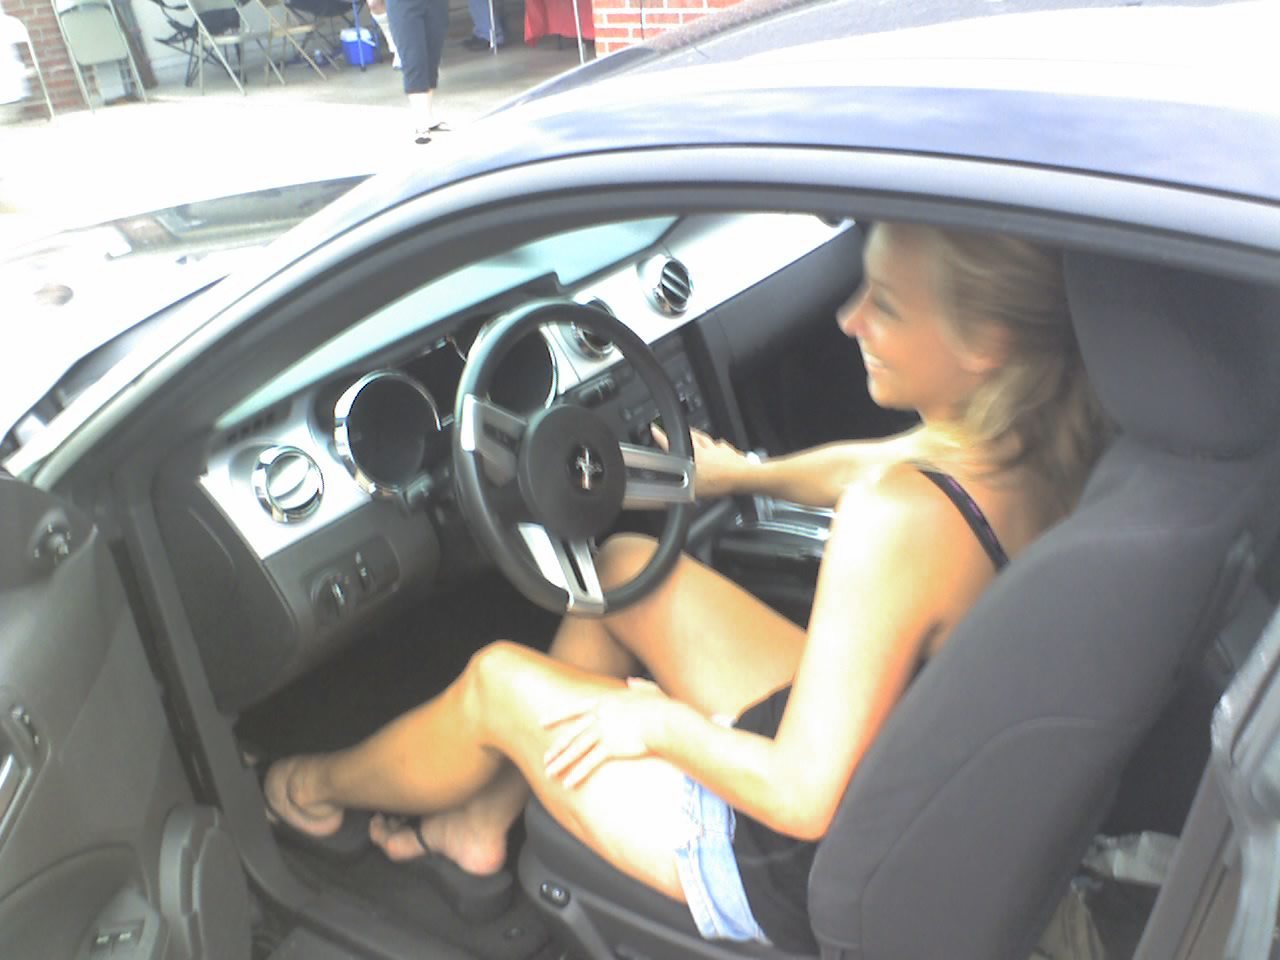

every one else arrived soon after .


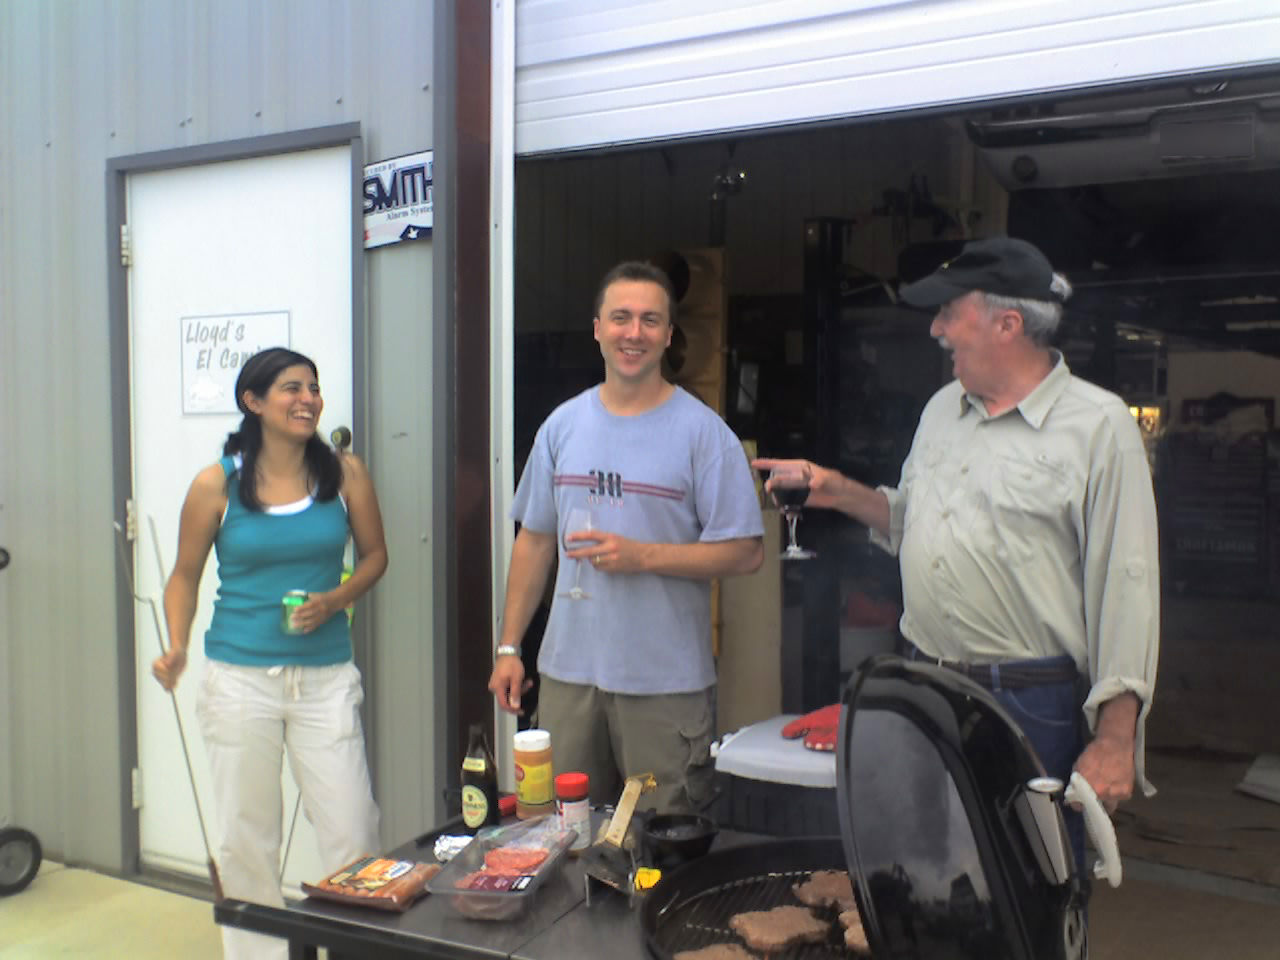

dad manned the grill .


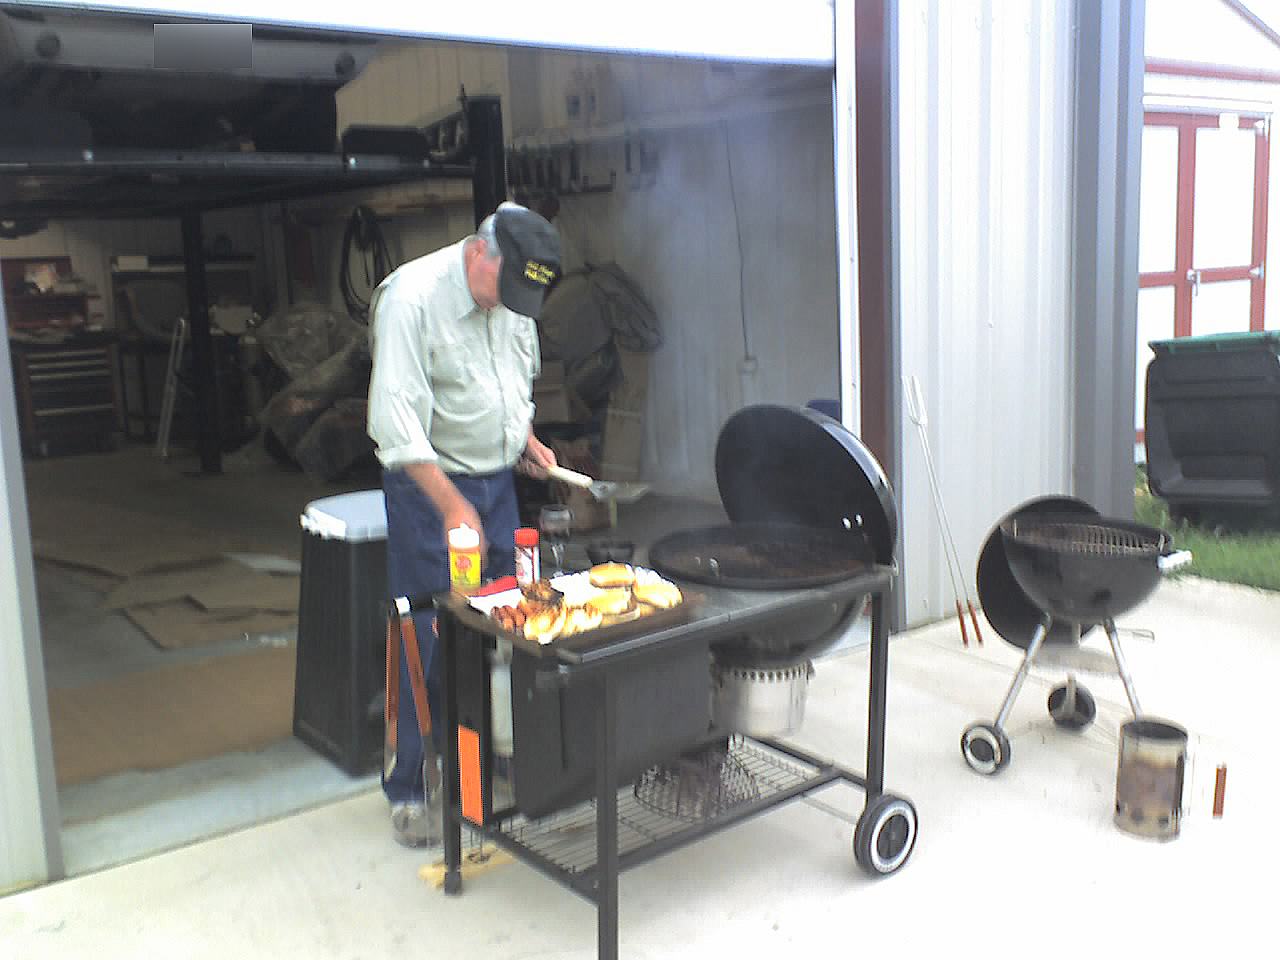

there was so much food and it was all delicious .


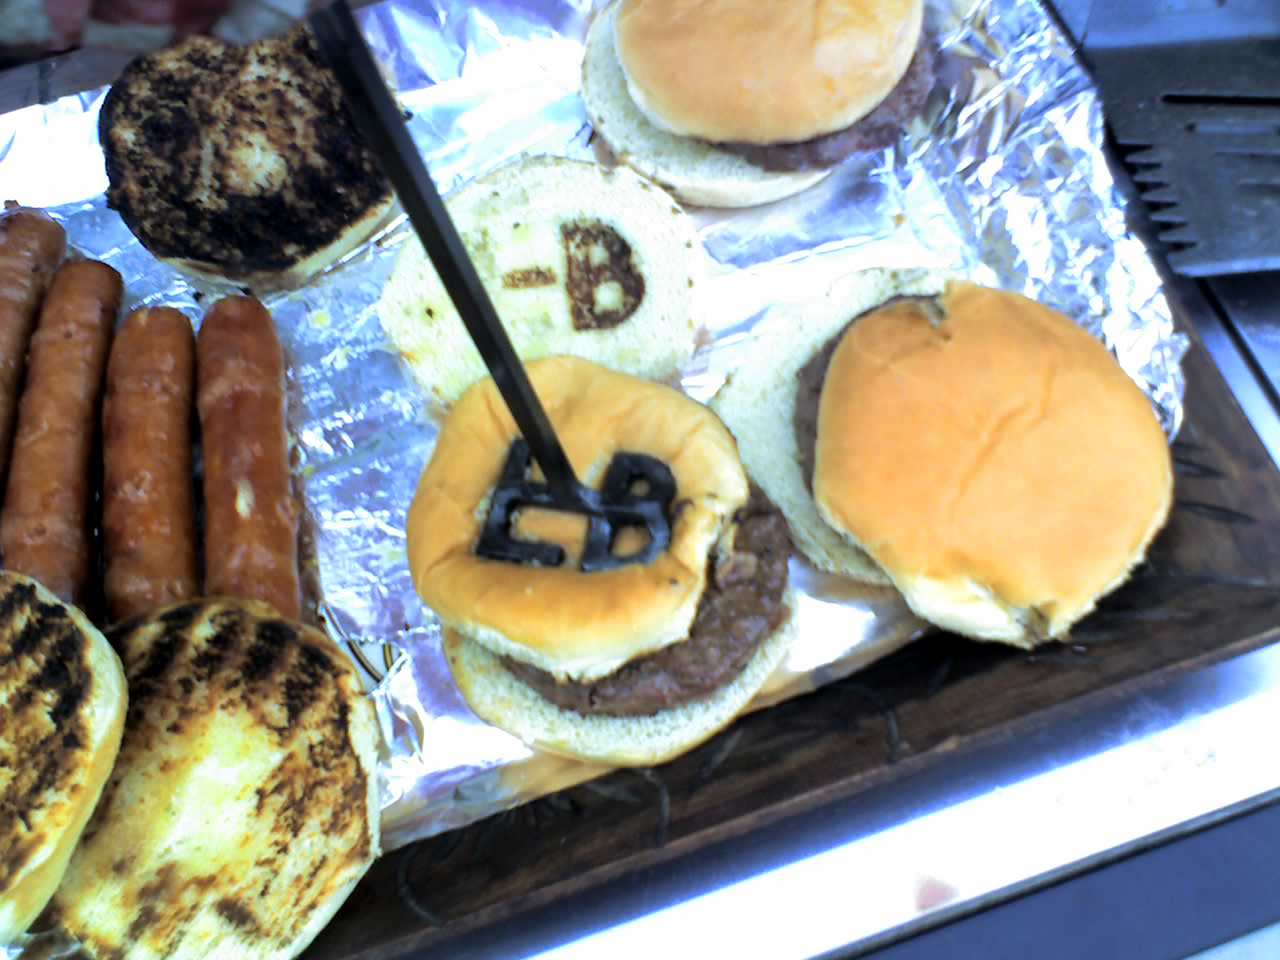

we ended the day shooting off some fireworks .


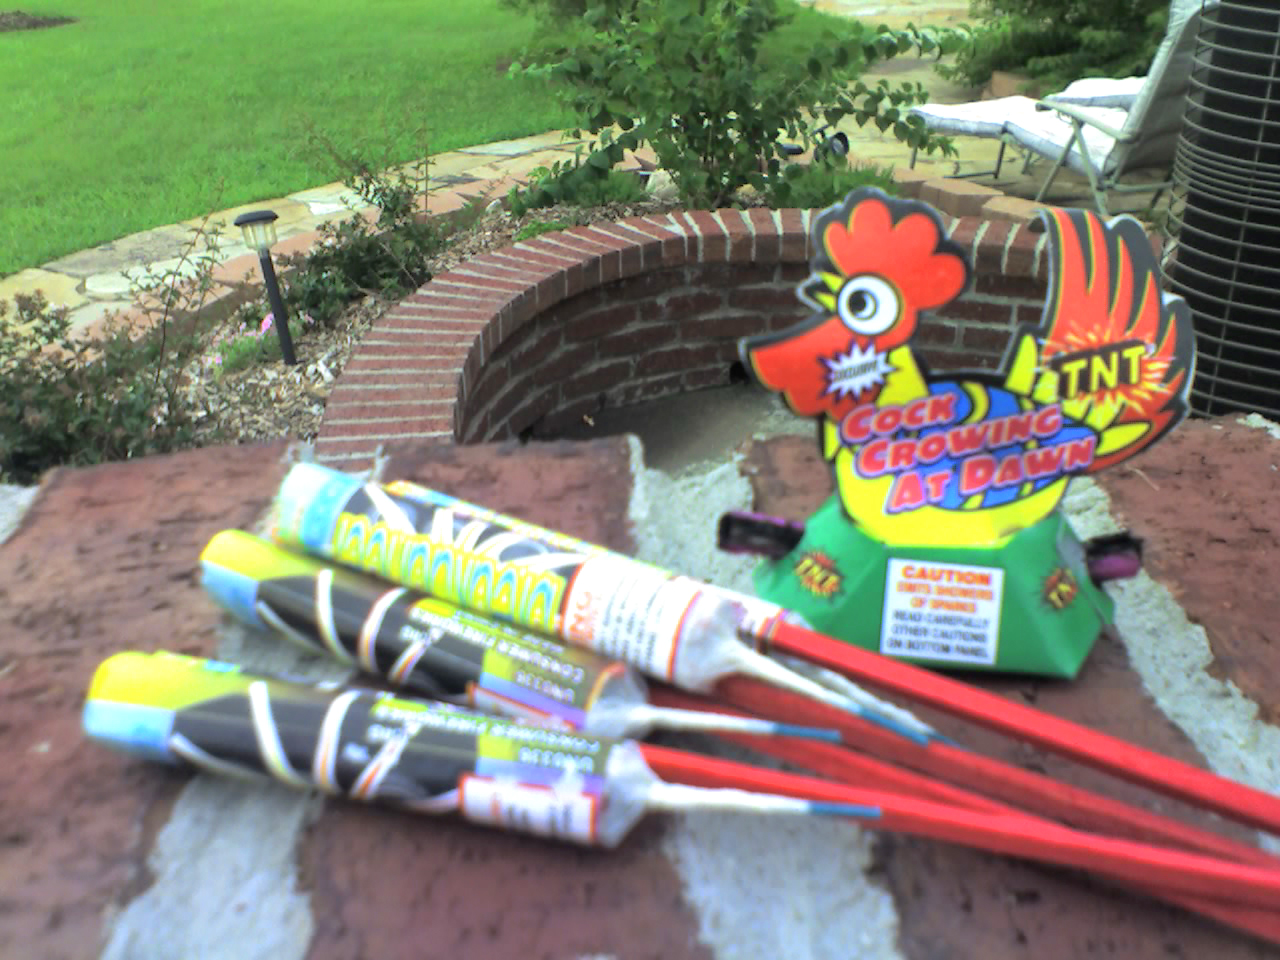

In [214]:
explore_images("40470")